In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from ridge_regressor import RidgeRegressor

In [2]:
import random
random.seed(10)

### Importing the Dataset

In [3]:
df = pd.read_csv("./housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
names = df.columns
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
label = 'median_house_value'

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
# Randomly sample 1000 values from the dataset
df = df.sample(1000)

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20595,-121.56,39.16,12.0,3349.0,642.0,2029.0,619.0,2.9647,88800.0,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN
14939,-117.03,32.63,13.0,2087.0,313.0,1165.0,330.0,5.7789,227700.0,NEAR OCEAN
19006,-121.98,38.32,45.0,19.0,5.0,7460.0,6.0,10.2264,137500.0,INLAND
17792,-121.82,37.36,33.0,1624.0,337.0,1412.0,323.0,4.0385,167600.0,<1H OCEAN


In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,990.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.593080,35.677040,29.204000,2507.254000,506.529293,1371.611000,475.107000,3.901976,205256.245000
std,2.042042,2.154233,12.564324,1817.570922,371.427287,1009.778919,344.078959,1.968583,115894.956186
min,-124.170000,32.580000,2.000000,12.000000,3.000000,14.000000,6.000000,0.499900,26600.000000
25%,-121.842500,33.940000,19.000000,1438.000000,290.250000,786.750000,274.250000,2.612875,117600.000000
50%,-118.515000,34.270000,29.000000,2106.000000,426.000000,1127.500000,400.000000,3.503900,174550.000000
75%,-117.977500,37.760000,39.000000,2984.750000,608.750000,1673.500000,576.000000,4.745950,264075.000000
max,-114.650000,41.800000,52.000000,16289.000000,4585.000000,9879.000000,4176.000000,15.000100,500001.000000


In [35]:
df["ocean_proximity"].value_counts()

<1H OCEAN     421
INLAND        325
NEAR OCEAN    130
NEAR BAY      124
Name: ocean_proximity, dtype: int64

In [36]:
dummies = pd.get_dummies(df["ocean_proximity"])
dummies

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
20595,0,1,0,0
4937,1,0,0,0
14939,0,0,0,1
19006,0,1,0,0
17792,1,0,0,0
...,...,...,...,...
10648,1,0,0,0
5524,1,0,0,0
8177,1,0,0,0
1385,0,0,1,0


In [37]:
df = df.join(dummies)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 20595 to 14214
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      990 non-null    float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
 10  <1H OCEAN           1000 non-null   uint8  
 11  INLAND              1000 non-null   uint8  
 12  NEAR BAY            1000 non-null   uint8  
 13  NEAR OCEAN          1000 non-null   uint8  
dtypes: float64(9), object(1), uint8(4)
memory usage: 122.1+ KB


In [39]:
df.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        10
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
<1H OCEAN              0
INLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64

In [40]:
mean = df["total_bedrooms"].mean()
df["total_bedrooms"].fillna(value=mean,inplace=True)

In [41]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [42]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.593080,35.677040,29.204000,2507.254000,506.529293,1371.611000,475.107000,3.901976,205256.245000,0.421000,0.325000,0.124000,0.130000
std,2.042042,2.154233,12.564324,1817.570922,369.563616,1009.778919,344.078959,1.968583,115894.956186,0.493967,0.468609,0.329746,0.336472
min,-124.170000,32.580000,2.000000,12.000000,3.000000,14.000000,6.000000,0.499900,26600.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.842500,33.940000,19.000000,1438.000000,292.750000,786.750000,274.250000,2.612875,117600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.515000,34.270000,29.000000,2106.000000,428.000000,1127.500000,400.000000,3.503900,174550.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.977500,37.760000,39.000000,2984.750000,607.250000,1673.500000,576.000000,4.745950,264075.000000,1.000000,1.000000,0.000000,0.000000
max,-114.650000,41.800000,52.000000,16289.000000,4585.000000,9879.000000,4176.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [44]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            '<1H OCEAN', 'INLAND',
             'NEAR BAY', 'NEAR OCEAN']


In [45]:
df.corr()[label]


C:\Users\Saif\AppData\Local\Temp\ipykernel_22752\423548386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[label]


longitude            -0.053591
latitude             -0.127458
housing_median_age    0.072240
total_rooms           0.167997
total_bedrooms        0.067520
population           -0.036227
households            0.073300
median_income         0.677561
median_house_value    1.000000
<1H OCEAN             0.212204
INLAND               -0.461241
NEAR BAY              0.158486
NEAR OCEAN            0.175527
Name: median_house_value, dtype: float64

### Splitting Dataset into training and test sets

In [46]:
X_train,X_test,y_train,y_test = train_test_split(df[features],df[label],random_state=10,train_size=0.7)

### Linear Regression for base score



In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
((model.predict(X_test) - y_test)**2).mean()

5228916134.84039

In [23]:
model = RidgeRegressor().fit(X_train,y_train)
model.score(X_test,y_test)

5389344848.56916

### Parameter grids for Cross Validation

In [24]:
params = {
    "l": [2**i for i in range(-4,5)],
    "c": np.linspace(0,1000,6),
}
params


{'l': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16],
 'c': array([   0.,  200.,  400.,  600.,  800., 1000.])}

In [25]:
grid = GridSearchCV(RidgeRegressor(kernel="linear"),params,cv=5,verbose=3,n_jobs=-1,scoring="neg_mean_squared_error")
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RidgeRegressor(), n_jobs=-1,
             param_grid={'c': array([   0.,  200.,  400.,  600.,  800., 1000.]),
                         'l': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]},
             scoring='neg_mean_squared_error', verbose=3)

In [26]:
grid.best_params_

{'c': 1000.0, 'l': 4}

In [27]:
grid.best_score_

-5784544466.996961

In [28]:
grid.cv_results_

{'mean_fit_time': array([ 95.8212584 ,  94.7824357 ,  95.32099576,  96.92171669,
         99.02010732,  99.29098339,  99.26804471, 100.27575107,
         98.29245262,  98.81046805,  99.1300139 ,  99.42382836,
         99.11285939,  99.7461668 ,  99.89915767, 100.86776853,
         99.17948136,  98.21007295,  99.6434412 ,  98.9704402 ,
         99.52376118, 100.5075314 ,  99.81538148,  99.91032782,
         99.08772669,  99.77090044,  98.4244997 , 100.54203911,
         99.8492353 ,  99.71158123, 100.02135329,  99.90473289,
         98.54098825,  98.09777298,  99.70946474,  98.96844554,
         99.06558595,  99.68672557,  99.0262908 ,  98.31359611,
        100.00188279,  97.98028741,  98.52004442,  99.55368128,
         98.68221064,  98.98998799,  98.59903297,  99.1272212 ,
         98.36665411,  98.54517713, 100.27255945,  95.6064332 ,
         93.76256151,  91.69768124]),
 'std_fit_time': array([0.8474353 , 0.59164723, 1.00710769, 1.07932153, 1.93369095,
        1.11812692, 0.9120020

In [29]:
print(grid)

GridSearchCV(cv=5, estimator=RidgeRegressor(), n_jobs=-1,
             param_grid={'c': array([   0.,  200.,  400.,  600.,  800., 1000.]),
                         'l': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]},
             scoring='neg_mean_squared_error', verbose=3)


### Test Score with Best Parameters for Linear Kernel


In [47]:
model = RidgeRegressor(kernel="linear",c=1000,l=4).fit(X_train,y_train)
model.score(X_test,y_test)

5140785523.318826

### Analyzing GridSearchCV results

In [30]:
df_linear = pd.DataFrame(grid.cv_results_)
df_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_c,param_l,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,95.821258,0.847435,24.600440,0.536530,0.0,0.0625,"{'c': 0.0, 'l': 0.0625}",-7.349565e+09,-7.396601e+09,-4.555860e+09,-4.933727e+09,-5.009599e+09,-5.849070e+09,1.253897e+09,46
1,94.782436,0.591647,24.344524,0.520448,0.0,0.125,"{'c': 0.0, 'l': 0.125}",-7.355855e+09,-7.401726e+09,-4.561300e+09,-4.938216e+09,-5.013348e+09,-5.854089e+09,1.254389e+09,47
2,95.320996,1.007108,24.531823,0.582318,0.0,0.25,"{'c': 0.0, 'l': 0.25}",-7.359209e+09,-7.403942e+09,-4.564288e+09,-4.940971e+09,-5.015777e+09,-5.856837e+09,1.254395e+09,48
3,96.921717,1.079322,24.719921,0.583582,0.0,0.5,"{'c': 0.0, 'l': 0.5}",-7.360888e+09,-7.403901e+09,-4.565452e+09,-4.942997e+09,-5.017358e+09,-5.858119e+09,1.254039e+09,50
4,99.020107,1.933691,24.568127,0.240193,0.0,1,"{'c': 0.0, 'l': 1}",-7.361489e+09,-7.401462e+09,-4.565437e+09,-4.945239e+09,-5.018962e+09,-5.858518e+09,1.253044e+09,52
5,99.290983,1.118127,24.689801,0.336551,0.0,2,"{'c': 0.0, 'l': 2}",-7.361525e+09,-7.395616e+09,-4.564471e+09,-4.948831e+09,-5.021401e+09,-5.858369e+09,1.250964e+09,51
6,99.268045,0.912002,25.209811,0.190753,0.0,4,"{'c': 0.0, 'l': 4}",-7.361382e+09,-7.384232e+09,-4.562320e+09,-4.955780e+09,-5.026167e+09,-5.857976e+09,1.246938e+09,49
7,100.275751,0.548027,25.115064,0.206994,0.0,8,"{'c': 0.0, 'l': 8}",-7.362510e+09,-7.364442e+09,-4.559210e+09,-4.970220e+09,-5.036562e+09,-5.858589e+09,1.239571e+09,53
8,98.292453,1.539764,24.240801,0.194038,0.0,16,"{'c': 0.0, 'l': 16}",-7.369838e+09,-7.335333e+09,-4.557505e+09,-5.001094e+09,-5.060364e+09,-5.864827e+09,1.227170e+09,54
9,98.810468,1.897232,24.373048,0.302691,200.0,0.0625,"{'c': 200.0, 'l': 0.0625}",-7.238855e+09,-7.319330e+09,-4.464771e+09,-4.909276e+09,-5.005478e+09,-5.787542e+09,1.231697e+09,29


In [48]:
df1 = df_linear[["param_c","param_l"]]
df1["mse"] = -df_linear["mean_test_score"]
df1.columns = ["c","l","mse"]
df1 = df1[df1["mse"] < 10000000000] # The normal scores are in the range of 5.xx * e+09, any value which is far greater than this can be taken as infinity. These values ruin the presentation of the graph, and hence we are ignoring them.
df1

C:\Users\Saif\AppData\Local\Temp\ipykernel_22752\2378252013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mse"] = -df_linear["mean_test_score"]


,c,l,mse
0,0.0,0.0625,5.849070e+09
1,0.0,0.125,5.854089e+09
2,0.0,0.25,5.856837e+09
3,0.0,0.5,5.858119e+09
4,0.0,1,5.858518e+09
5,0.0,2,5.858369e+09
6,0.0,4,5.857976e+09
7,0.0,8,5.858589e+09
8,0.0,16,5.864827e+09
9,200.0,0.0625,5.787542e+09


C:\Users\Saif\AppData\Local\Temp\ipykernel_22752\2522940076.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in df1.groupby(["c"]):


Text(0.5, 1.0, 'Linear Kernel: log2(l) vs MSE')

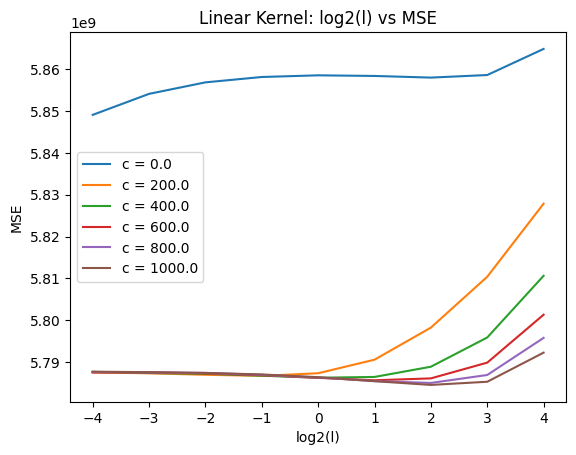

In [49]:

for name,group in df1.groupby(["c"]):
    plt.plot(group["l"].apply(lambda x: np.log2(x)),group["mse"],label=f"c = {name}")
plt.legend()
plt.xlabel("log2(l)")
plt.ylabel("MSE")
plt.title("Linear Kernel: log2(l) vs MSE")

C:\Users\Saif\AppData\Local\Temp\ipykernel_22752\1401690948.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in df1.groupby(["l"]):


Text(0.5, 1.0, 'Linear Kernel: c vs MSE')

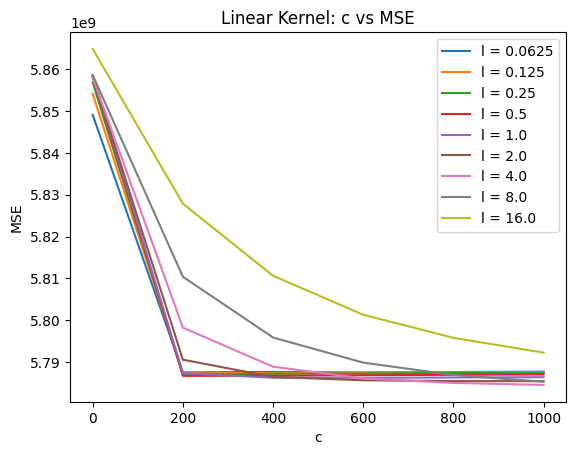

In [50]:

for name,group in df1.groupby(["l"]):
    plt.plot(group["c"],group["mse"],label=f"l = {name}")
plt.legend()
plt.xlabel("c")
plt.ylabel("MSE")
plt.title("Linear Kernel: c vs MSE")

In [34]:
params = {
    "l": [2**i for i in range(-4,5)],
    "d": np.arange(1, 4),
    "r": np.linspace(0,1000,6),
}


In [35]:
grid = GridSearchCV(RidgeRegressor(kernel="polynomial"),params,cv=5,verbose=3,n_jobs=-1,scoring="neg_mean_squared_error")
grid.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RidgeRegressor(kernel='polynomial'), n_jobs=-1,
             param_grid={'d': array([1, 2, 3]),
                         'l': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16],
                         'r': array([   0.,  200.,  400.,  600.,  800., 1000.])},
             scoring='neg_mean_squared_error', verbose=3)

In [36]:
grid.best_params_

{'d': 1, 'l': 4, 'r': 1000.0}

In [37]:
grid.best_score_

-5784544466.996961

### Test Error rate with Best parameters

### Analyzing GridSearchCV results (Polynomial kernel)

In [52]:
df_polynomial = pd.DataFrame(grid.cv_results_)
df_polynomial

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_d,param_l,param_r,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,94.896729,0.839613,24.488938,0.348279,1,0.0625,0.0,"{'d': 1, 'l': 0.0625, 'r': 0.0}",-7.349565e+09,-7.396601e+09,-4.555860e+09,-4.933727e+09,-5.009599e+09,-5.849070e+09,1.253897e+09,46
1,95.384824,0.592016,24.669056,0.266922,1,0.0625,200.0,"{'d': 1, 'l': 0.0625, 'r': 200.0}",-7.238855e+09,-7.319330e+09,-4.464771e+09,-4.909276e+09,-5.005478e+09,-5.787542e+09,1.231697e+09,29
2,95.356700,0.735464,24.438872,0.251216,1,0.0625,400.0,"{'d': 1, 'l': 0.0625, 'r': 400.0}",-7.238376e+09,-7.319211e+09,-4.464573e+09,-4.909837e+09,-5.006268e+09,-5.787653e+09,1.231416e+09,33
3,97.044389,1.109339,24.511278,0.243394,1,0.0625,600.0,"{'d': 1, 'l': 0.0625, 'r': 600.0}",-7.237934e+09,-7.319212e+09,-4.463908e+09,-4.909988e+09,-5.006538e+09,-5.787516e+09,1.231400e+09,28
4,97.431953,0.411682,24.398579,0.213159,1,0.0625,800.0,"{'d': 1, 'l': 0.0625, 'r': 800.0}",-7.238312e+09,-7.319113e+09,-4.464096e+09,-4.910105e+09,-5.006547e+09,-5.787634e+09,1.231406e+09,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,99.066184,0.868247,24.572116,0.082221,3,16,200.0,"{'d': 3, 'l': 16, 'r': 200.0}",-2.458343e+22,-2.044862e+20,-4.710215e+20,-2.957005e+20,-8.166953e+19,-5.127261e+21,9.728913e+21,116
158,98.922767,0.931451,24.419923,0.220376,3,16,400.0,"{'d': 3, 'l': 16, 'r': 400.0}",-5.109708e+24,-2.074738e+20,-1.194518e+20,-2.349442e+21,-2.503866e+20,-1.022527e+24,2.043591e+24,158
159,98.476959,1.159366,22.622926,2.193955,3,16,600.0,"{'d': 3, 'l': 16, 'r': 600.0}",-6.638210e+18,-2.573465e+19,-5.532384e+19,-4.285719e+20,-4.345966e+18,-1.041229e+20,1.632495e+20,102
160,83.906708,3.186712,16.672631,0.524164,3,16,800.0,"{'d': 3, 'l': 16, 'r': 800.0}",-8.378257e+22,-9.311447e+20,-8.241859e+22,-3.895833e+21,-1.514669e+20,-3.423592e+22,3.991972e+22,141


In [51]:
df_polynomial.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,162.000000
mean,97.773498,0.692989,24.393641,0.238289,-5.602176e+23,-2.469975e+21,-3.836537e+21,-4.679793e+22,-1.353612e+22,-1.253716e+23,2.451548e+23,81.500000
std,2.132005,0.299018,1.066418,0.176809,3.428523e+24,2.321104e+22,2.602524e+22,4.366690e+23,1.243529e+23,6.910073e+23,1.379234e+24,46.909487
min,75.805563,0.143947,13.628184,0.036035,-3.482778e+25,-2.912428e+23,-2.877139e+23,-5.349214e+24,-1.502581e+24,-6.969957e+24,1.220246e+09,1.000000
25%,97.757532,0.537656,24.439321,0.193240,-2.305368e+22,-3.815916e+19,-4.149772e+19,-5.738815e+20,-5.113805e+19,-7.475394e+21,1.233643e+09,41.250000
50%,98.034243,0.650301,24.509284,0.219651,-7.139238e+18,-1.929065e+17,-1.874981e+17,-5.881723e+17,-1.333009e+17,-6.285773e+18,1.056564e+19,81.500000
75%,98.324267,0.808304,24.593758,0.258712,-7.279134e+09,-7.319213e+09,-4.486782e+09,-4.934849e+09,-5.010185e+09,-5.799007e+09,1.191571e+22,121.750000
max,99.181476,3.186712,24.862140,2.193955,-7.237716e+09,-7.271039e+09,-4.463908e+09,-4.901896e+09,-4.988040e+09,-5.784544e+09,1.392891e+25,162.000000


In [60]:
df1 = df_polynomial[["param_d","param_l","param_r"]]
df1["mse"] = -df_polynomial["mean_test_score"]
df1.columns = ["d","l","r","mse"]
df1

C:\Users\Saif\AppData\Local\Temp\ipykernel_22752\3681691839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mse"] = -df_polynomial["mean_test_score"]


,d,l,r,mse
0,1,0.0625,0.0,5.849070e+09
1,1,0.0625,200.0,5.787542e+09
2,1,0.0625,400.0,5.787653e+09
3,1,0.0625,600.0,5.787516e+09
4,1,0.0625,800.0,5.787634e+09
...,...,...,...,...
157,3,16,200.0,5.127261e+21
158,3,16,400.0,1.022527e+24
159,3,16,600.0,1.041229e+20
160,3,16,800.0,3.423592e+22


Text(0.5, 1.0, 'Polynomial Kernel: log2(l) vs MSE')

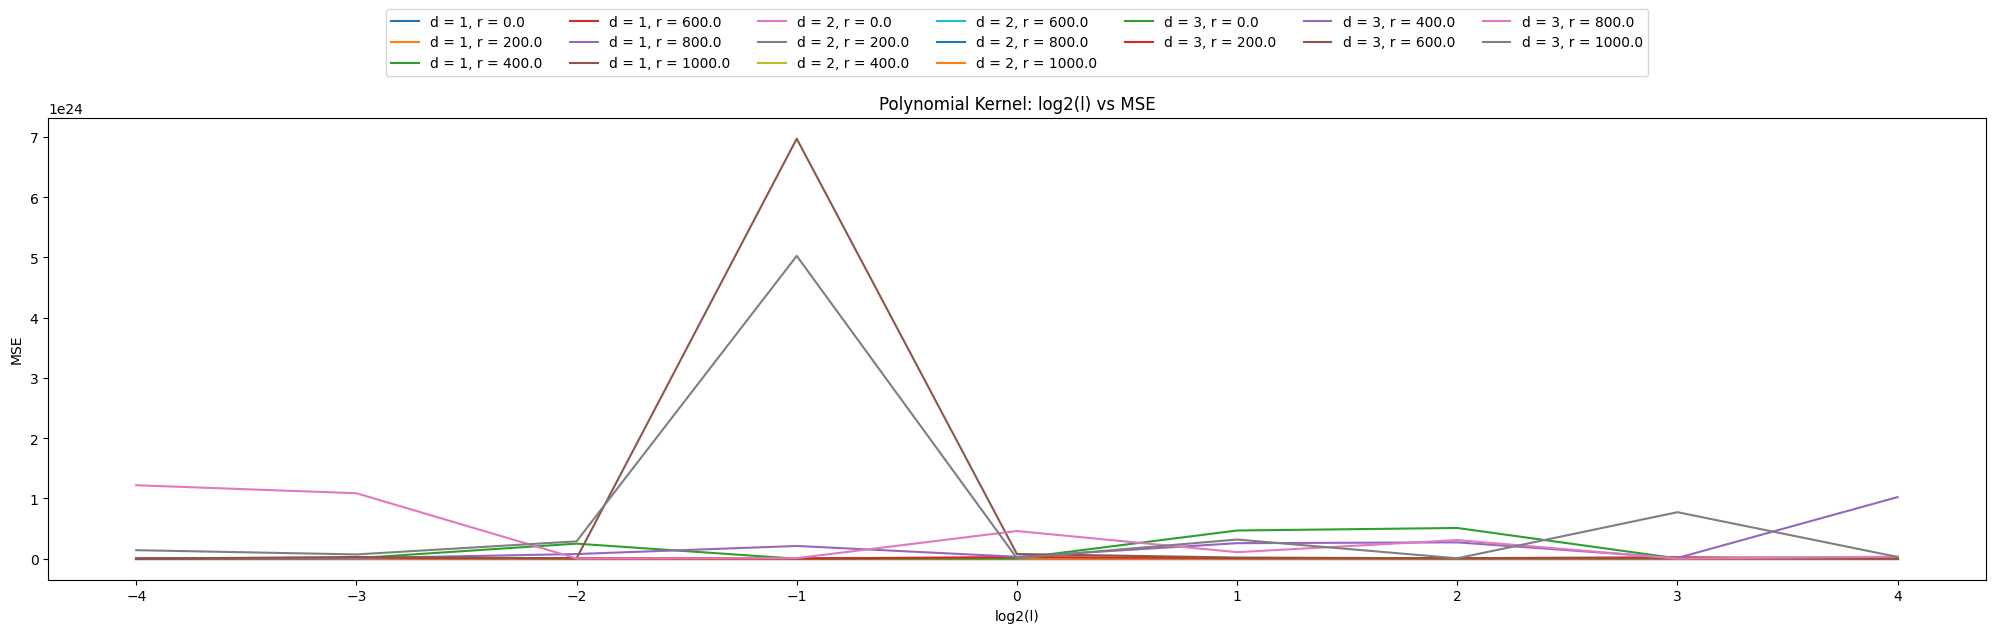

In [63]:
plt.figure(figsize=(25,6))
for name,group in df1.groupby(["d","r"]):
    plt.plot(group["l"].apply(lambda x: np.log2(x)),group["mse"],label=f"d = {name[0]}, r = {name[1]}")
plt.legend(loc="upper center",ncol=7,bbox_to_anchor=(0.5,1.25))
# plt.yticks(np.linspace(18,24,16))
plt.xlabel("log2(l)")
plt.ylabel("MSE")
plt.title("Polynomial Kernel: log2(l) vs MSE")

Text(0.5, 1.0, 'Polynomial Kernel: d vs MSE')

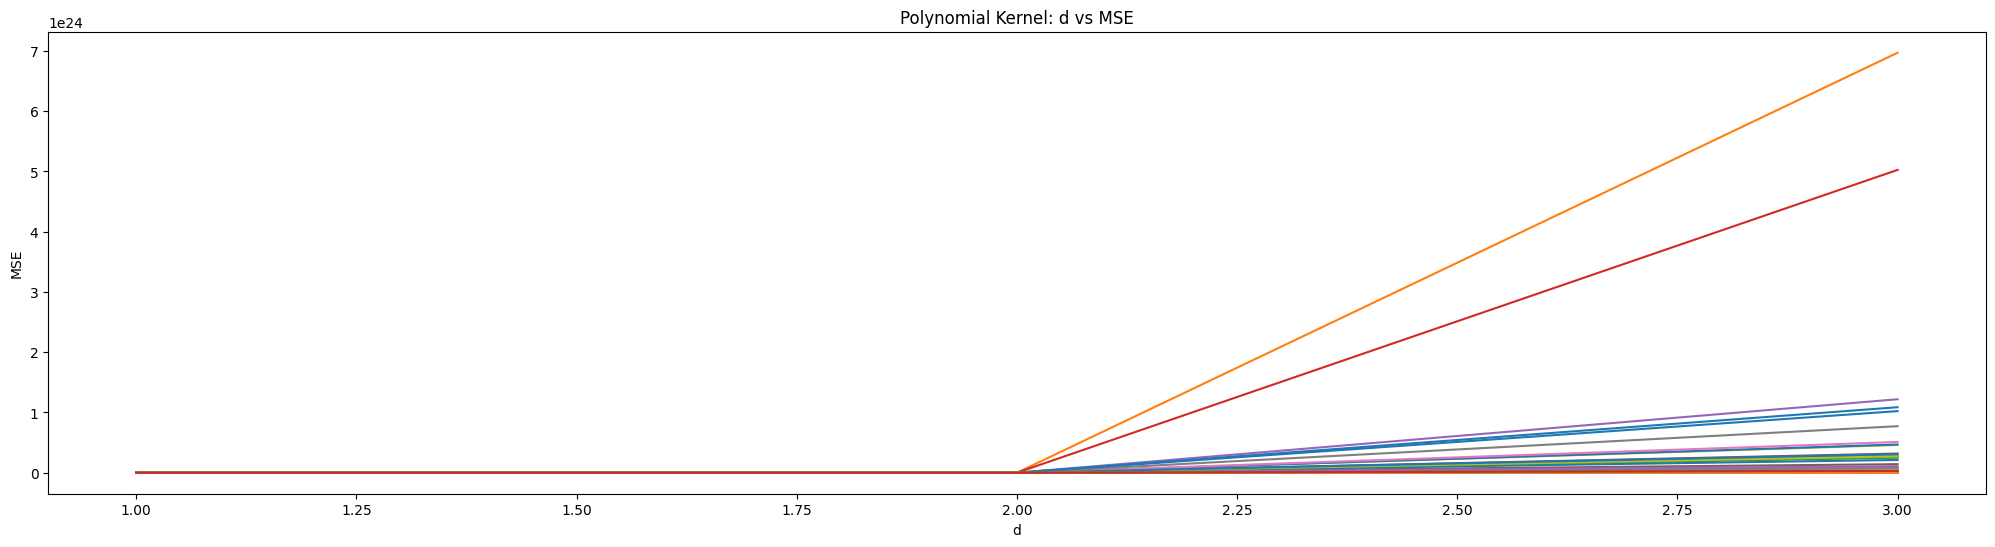

In [64]:
plt.figure(figsize=(25,6))
for name,group in df1.groupby(["l","r"]):
    plt.plot(group["d"],group["mse"],label=f"l = {name[0]}, r = {name[1]}")
# plt.legend()
plt.xlabel("d")
plt.ylabel("MSE")
plt.title("Polynomial Kernel: d vs MSE")

Text(0.5, 1.0, 'Polynomial Kernel: r vs MSE')

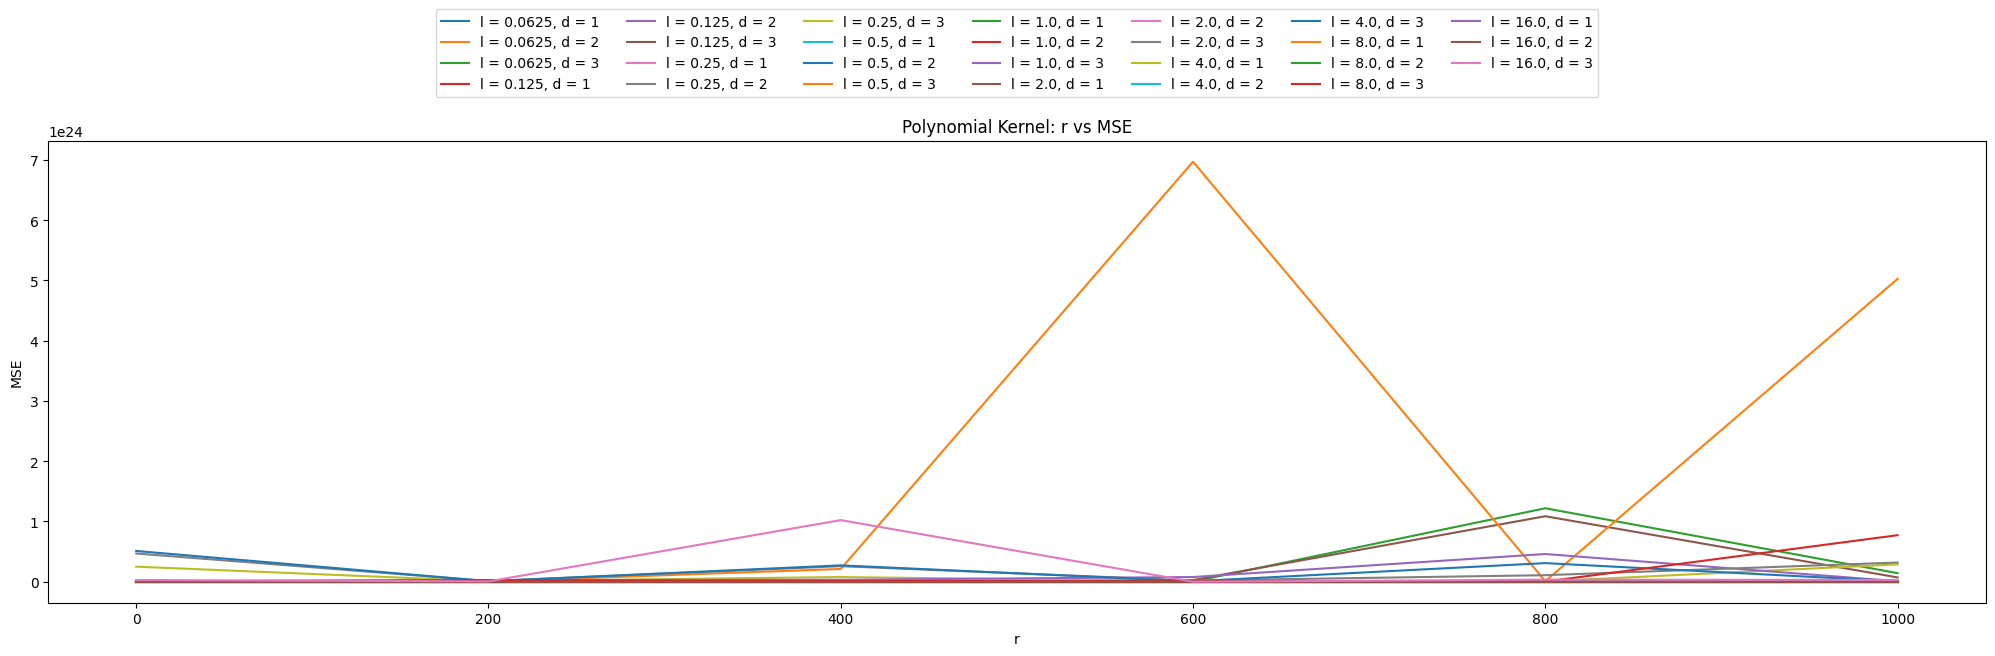

In [68]:
plt.figure(figsize=(25,6))

for name,group in df1.groupby(["l","d"]):
    plt.plot(group["r"],group["mse"],label=f"l = {name[0]}, d = {name[1]}")
plt.legend(loc="upper center",ncol=7,bbox_to_anchor=(0.5,1.3))
plt.xlabel("r")
plt.ylabel("MSE")
plt.title("Polynomial Kernel: r vs MSE")